# Predicción de la longitud del sépalo en función de la anchura del pétalo 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [3]:
session = tf.Session()
iris = datasets.load_iris()

In [4]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

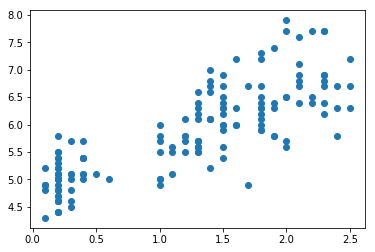

In [5]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [6]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [7]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [8]:
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [22]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[0.9065258]], b=[[4.808634]], Loss = 0.22371332
Paso #20, A=[[0.9048722]], b=[[4.814906]], Loss = 0.25603655
Paso #30, A=[[0.8748795]], b=[[4.8022304]], Loss = 0.28828332
Paso #40, A=[[0.9019478]], b=[[4.800884]], Loss = 0.28552753
Paso #50, A=[[0.8860494]], b=[[4.7687306]], Loss = 0.19477294
Paso #60, A=[[0.8576704]], b=[[4.767552]], Loss = 0.13051029
Paso #70, A=[[0.8668497]], b=[[4.7581906]], Loss = 0.14527902
Paso #80, A=[[0.87931824]], b=[[4.766436]], Loss = 0.13576782
Paso #90, A=[[0.88388556]], b=[[4.744304]], Loss = 0.31360862
Paso #100, A=[[0.91328746]], b=[[4.767719]], Loss = 0.32167244


In [23]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [24]:
print(str(slope)+"x+"+str(intercept))

0.91328746x+4.767719


In [25]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

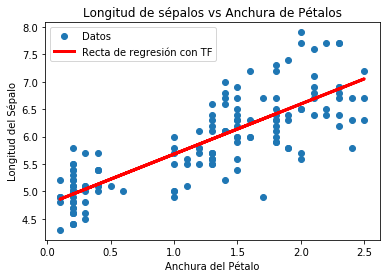

In [26]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

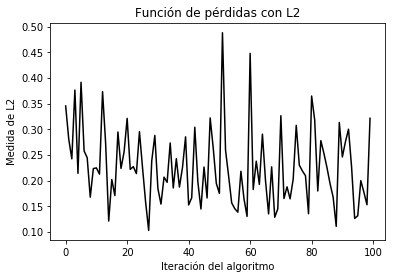

In [27]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [35]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [36]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [37]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [38]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [39]:
loss_vect_l1 = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[0.9570717]], b=[[1.0481312]], Loss = 3.7066453
Paso #20, A=[[1.5368718]], b=[[1.5481308]], Loss = 2.3340185
Paso #30, A=[[2.0622716]], b=[[2.0201304]], Loss = 1.6486408
Paso #40, A=[[2.1958714]], b=[[2.2921305]], Loss = 1.4036391
Paso #50, A=[[2.2508712]], b=[[2.5401301]], Loss = 0.90522826
Paso #60, A=[[2.2262712]], b=[[2.73213]], Loss = 0.80390775
Paso #70, A=[[2.144871]], b=[[2.8601298]], Loss = 0.9367174
Paso #80, A=[[2.0190709]], b=[[2.9561296]], Loss = 0.81605357
Paso #90, A=[[2.0084705]], b=[[3.1201293]], Loss = 0.9169229
Paso #100, A=[[1.8792707]], b=[[3.212129]], Loss = 0.85452604
Paso #110, A=[[1.8228707]], b=[[3.3601289]], Loss = 0.87949914
Paso #120, A=[[1.7576705]], b=[[3.488129]], Loss = 0.68791217
Paso #130, A=[[1.6348706]], b=[[3.576129]], Loss = 0.60373384
Paso #140, A=[[1.5090706]], b=[[3.668129]], Loss = 0.5361829
Paso #150, A=[[1.4118706]], b=[[3.784129]], Loss = 0.6235986
Paso #160, A=[[1.3688706]], b=[[3.9161289]], Loss = 0.4827787
Paso #170, A=[[1.2

In [40]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [41]:
print(str(slope)+"x+"+str(intercept))

0.83807087x+4.820127


In [42]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

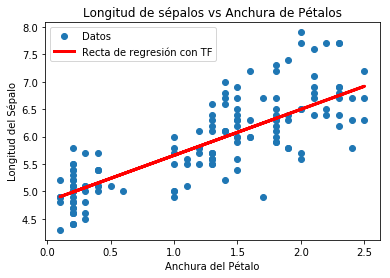

In [43]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

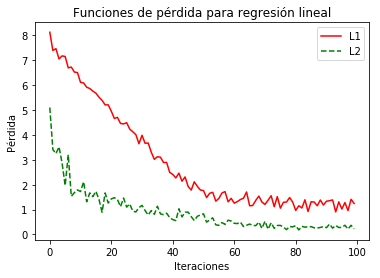

In [101]:
plt.plot(loss_vect_l1, 'r-', label = "L1")
plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funciones de pérdida para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend(loc = "upper right")
plt.show()

In [21]:
slope*np.mean(x_vals)+intercept

5.759749668916067

In [15]:
intercept

4.3478765

1.1986666666666668

In [18]:
np.mean(y_vals)

5.843333333333334